In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
image_ids = ["CA184632V0341", "CA184632V0342"]

In [10]:
import load.load_image as li
import load.load_transform as lt

images = []
for image_id in image_ids:
    image = li.load_image(image_id)
    images.append(image)

transforms = []
for image_id in image_ids:
    transform = lt.load_transform(image_id + "_transform")
    transforms.append(transform)

In [13]:
import src.sfm.snippets.identify_gpcs as ig

points_dict = ig.identify_gcps(images, transforms)

transform image 0
(1882, 2)
transform image 1
(2255, 2)


100%|██████████| 4137/4137 [00:50<00:00, 82.11it/s] 

Filter groups


{(-1924249.0, 752334.0): {'image_ids': [0, 1], 'relative_positions': [(9065, 440), (5520, 658)], 'avg_abs_coord': array([-1924249.,   752334.]), 'abs_coords': [(-1924250, 752338), (-1924248, 752330)]}, (-1924604.0, 752341.0): {'image_ids': [0, 1], 'relative_positions': [(8639, 608), (5094, 816)], 'avg_abs_coord': array([-1924604.,   752341.]), 'abs_coords': [(-1924602, 752337), (-1924606, 752345)]}, (-1926935.0, 753175.5): {'image_ids': [0, 1], 'relative_positions': [(5460, 698), (2054, 965)], 'avg_abs_coord': array([-1926935. ,   753175.5]), 'abs_coords': [(-1926935, 753176), (-1926935, 753175)]}, (-1924115.5, 752063.0): {'image_ids': [0, 1], 'relative_positions': [(9342, 707), (5777, 916)], 'avg_abs_coord': array([-1924115.5,   752063. ]), 'abs_coords': [(-1924117, 752065), (-1924114, 752061)]}, (-1924193.5, 752090.0): {'image_ids': [0, 1], 'relative_positions': [(9243, 717), (5668, 916)], 'avg_abs_coord': array([-1924193.5,   752090. ]), 'abs_coords': [(-1924191, 752086), (-1924196,

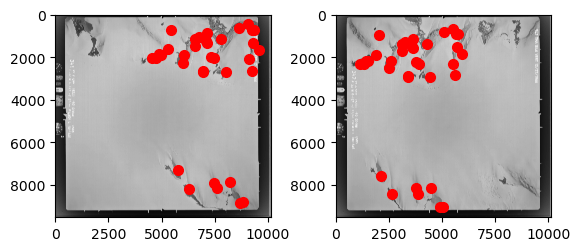

In [17]:
import display.display_images as di
print(points_dict)

rel_po_0 = []
rel_po_1 = []

for key, value in points_dict.items():
    image_ids = value['image_ids']
    relative_positions = value['relative_positions']
    
    # Assuming image_ids always contain 0 and 1 in that order if they exist
    if 0 in image_ids:
        index_0 = image_ids.index(0)
        rel_po_0.append(relative_positions[index_0])
    
    if 1 in image_ids:
        index_1 = image_ids.index(1)
        rel_po_1.append(relative_positions[index_1])

print(rel_po_0)

di.display_images(images, points=[rel_po_0, rel_po_1])